## 1. Loading the Data:

In [1]:
# import libraries that will be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
# read csv file
df = pd.read_csv(r"C:\Users\adiya\Documents\Uni\Data Science\1SA-Final-Project\hotel_bookings.csv")

In [3]:
# display the first 5 rows for a quick look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Understanding the Data:

In [4]:
# check the shape of the DataFrame (rows, columns)
# understand the amount of data
df.shape

(119390, 32)

In [5]:
# displays all columns
# the None parameter displays unlimited columns
pd.set_option("display.max_columns", None)
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [6]:
# description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> In a first observation it is clear some features (for example "company",
> and "agent") consist of many null values.

In [7]:
# summary of the numerical attributes
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


> ### Features in the DataFrame:
>> 0. hotel: Resort Hotel or City Hotel
>> 1. is_cancelled: Value indicating if the booking was canceled (1) or not (0)
>> 2. lead_time: Number of days between the booking date to the arrival date
>> 3. arrival_date_year: Year of arrival date
>> 4. arrival_date_month: Month  of arrival date
>> 5. arrival_date_week: Week number according to year of arrival
>> 6. arrival_date_day: Day (in numbers) of arrival date
>> 7. stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) booked for accommodation
>> 8. stays_in_week_nights: Number of week nights (Monday to Friday) booked for accommodation
>> 9. adults: Number of adults
>> 10. children: Number of children
>> 11. babies: Number of babies
>> 12. meal: Type of meal booked
>> 13. country: Country of origin
>> 14. market_segment: Market segment designation (TA- Travel Agents, TO- Tour Operators)
>> 15. distribution_channel: Booking distribution channel (TA- Travel Agents, T0- Tour Operators)
>> 16. is_repeated_guest: Value indication if booking name was from a repeated guest (1) or not (0)
>> 17. previous_cancellations: Number of previous bookings that were cancelled by the customer (prior to current booking)
>> 18. previous_bookings_not_canceled: Number of previous bookings not cancelled prior to current booking
>> 19. reserved_room_type: Code of room type reserved
>> 20. assigned_room_type: Code for the type of room assigned to the booking
>> 21. booking_changes: Number of changes made to the booking
>> 22. deposit_type: Indication on if the customer made a deposit to guarantee the booking
>> 23. agent: ID of the travel agency that made the booking
>> 24. company: ID of the company or organization that made the booking or is responsible for payment
>> 25. days_in_waiting_list: Number of days booking was in the waiting list until it was confirmed to the customer
>> 26. customer_type: Type of booking
>> 27. adr: Average Daily Rate (the sum of transactions divided by the number of nights stayed)
>> 28. required_car_parking_spaces: Number of car parking spaces requested
>> 29. total_of_special_requests: Number of special requests made by the customer
>> 30. reservation_status: Last reservation status (Canceled, Check-Out, No-Show)
>> 31. reservation_status_date: Date at which the last status was set

> ##### *Understanding the features helps gain insight on how to treat null values.*

In [8]:
# further examination of null values
# the methods below calculate the number of missing values
missing_values = df.isna().sum()
missing_values = missing_values[missing_values != 0]
missing_values

children         4
country        488
agent        16340
company     112593
dtype: int64

> The "company" and "agent" columns have a large amount of null values.
> Since they are irrelevant for research they can be removed.

In [9]:
# dropping "company" and "agent" columns
df.drop(["company", "agent"], axis=1, inplace=True)

> The children column has only 4 missing values. These can be replaced with 0, suggesting
> there were no kids during the stay.

In [10]:
# replacing null values in 'children' column with 0
df.fillna({"children": 0}, inplace=True)
# examining changes
df['children'].isnull().sum()

0

In [11]:
df["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
PYF        1
BWA        1
BHS        1
MDG        1
MLI        1
Name: country, Length: 177, dtype: int64

> As shown above, there are 177 different countries. This indicates that the data is representative
> worldwide, contrary to a specific region.
> A quick assessment will portray a better perspective on how to treat the missing data.

In [12]:
num1 = (df["country"].value_counts() <= 1).sum()
num10 = (df["country"].value_counts() <= 10).sum()
num50 = (df["country"].value_counts() <= 50).sum()
num100 = (df["country"].value_counts() <= 100).sum()
num1000 = (df["country"].value_counts() <= 1000).sum()

print("Number of countries with one or less instances:", num1,
      "\nNumber of countries with 10 or less instances:", num10,
      "\nNumber of countries with 50 or less instances:", num50,
      "\nNumber of countries with 100 or less instances:", num100,
      "\nNumber of countries with 1000 or less instances:", num1000)

Number of countries with one or less instances: 30 
Number of countries with 10 or less instances: 84 
Number of countries with 50 or less instances: 120 
Number of countries with 100 or less instances: 140 
Number of countries with 1000 or less instances: 162


> More than half of the instances have 50 or fewer observations in the DataFrame.
> Meanwhile, there are few countries with thousands. This shows that the countries
> are not the best option to represent results from the data since they are
> unevenly divided. For all the reasons stated, this column is unnecessary for further
> analysis.

In [13]:
# dropping "country" column
df.drop("country", axis=1, inplace=True)

> #### Quick look after changes:

In [14]:
# examining the changes
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [15]:
# checking if there are remaining null values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [16]:
# number of columns changed to 29
# number of instances is the same
df.shape

(119390, 29)

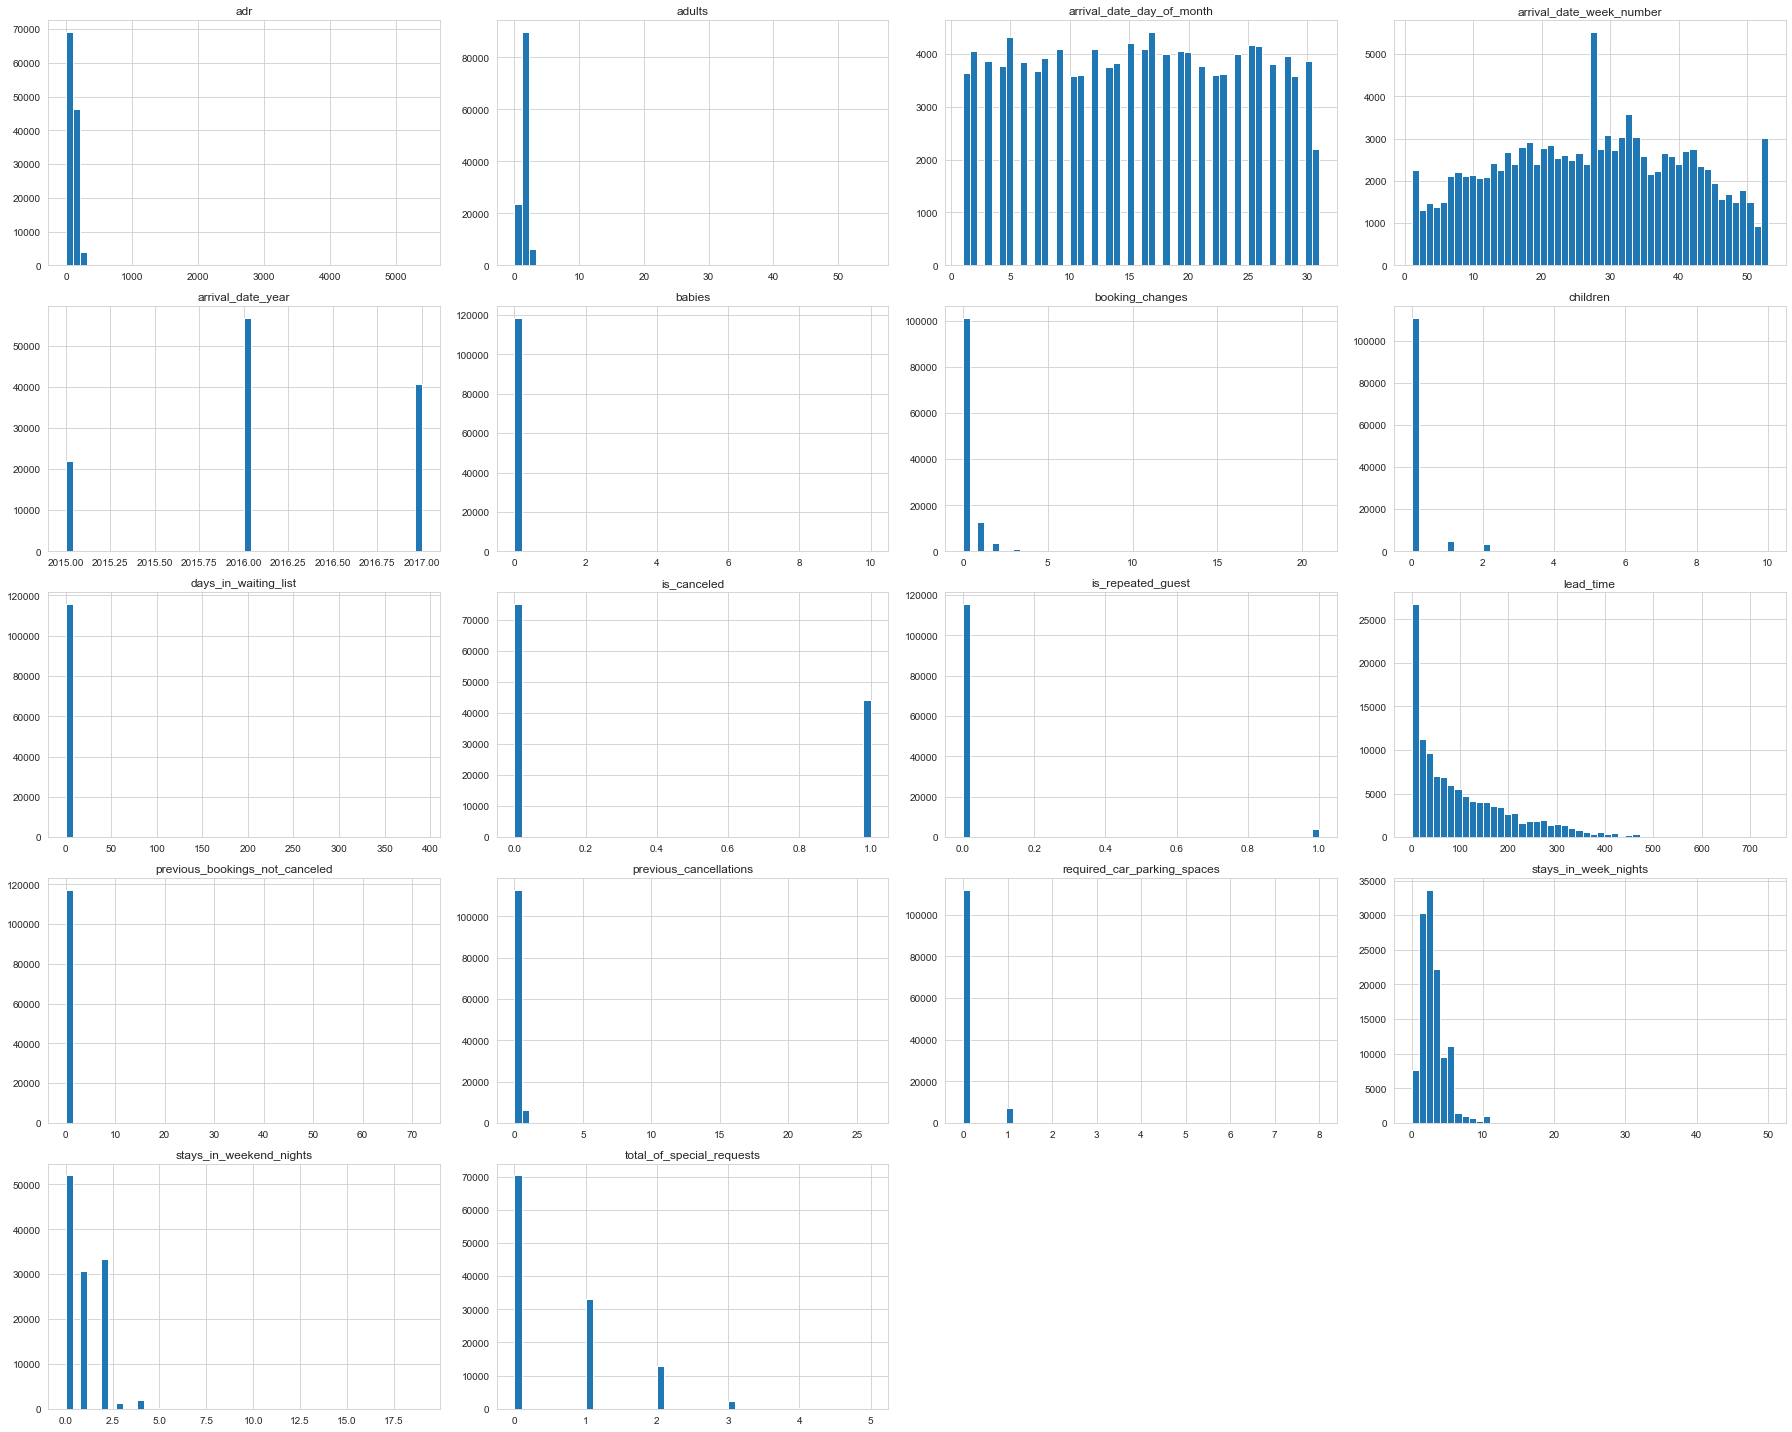

In [17]:
# a histogram plot for each numerical attribute
sns.set_style(style="whitegrid")
df.hist(bins=50, figsize=(25,20))
plt.tight_layout()
plt.show()

> A few observations from the histograms:
>> 1. Some weeks have a large distinction from others. This could be because of holiday or summer seasons, when people tend to travel more.
>> 2. Most bookings were made shortly before arrival.
>> 3. Bookings tend to be without children or babies.
>> 4. A lot of cancellations are made.
>> 5. The longest booking are roughly two weeks long, though most accommodations are shorter.

> ### Splitting the Data:
>> Before further analysis I will split the data into a training set and a testing set.
This will ensure avoidance of bias that could occur from learning the data as a whole.

In [18]:
# the reason for selecting 0.15 as the test size is because there is a large of data
# the random state parameter ensures that data will be the split the same way in each run
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.15, random_state=42)

In [19]:
print("Number of instances in training set: ", len(train_set))
print("Number of instances in testing set: ", len(test_set))

Number of instances in training set:  101481
Number of instances in testing set:  17909


## 3. Cleaning and Visualizing the Data:
> ##### *The motivation for this section is to gain more insights.*

In [20]:
# creating a deep copy of the training set
df2 = train_set.copy()

In [21]:
df2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
24840,Resort Hotel,0,156,2016,May,23,30,1,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,52.36,0,1,Check-Out,2016-06-05
6904,Resort Hotel,0,292,2016,July,29,10,1,0,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,72.90,1,2,Check-Out,2016-07-11


> In an earlier observation there were certain weeks when booking increased.
> Changing the months' column to numerical attributes would allow a more
> general view of when this tends to occur.

In [22]:
# converting months to integers
df2["arrival_date_month"] = pd.to_datetime(df["arrival_date_month"], format="%B").dt.month

In [23]:
# examining the changes
df2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
24840,Resort Hotel,0,156,2016,5,23,30,1,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,52.36,0,1,Check-Out,2016-06-05
6904,Resort Hotel,0,292,2016,7,29,10,1,0,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,72.90,1,2,Check-Out,2016-07-11
